# Imports:
---

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
import numpy as np

# import torch
import torch.nn as nn
# import torch.optim as optim
# import torchvision
# from ray import tune
# from torch.utils.data import DataLoader, TensorDataset #, Dataset
# import torch.nn.functional as F

# import wandb
# import os
from sklearn.decomposition import PCA
# import itertools
# import io

# from collections import Counter
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import KernelPCA

import importlib
import functions as f
import random

In [ ]:
# # Loading test spectra and background spectra
# file_path = '/mnt/usb/cmdunham/preprocessed_ims_data/test_data.csv'
# test_spectra = pd.read_csv(file_path)

In [ ]:
# file_path = '/mnt/usb/cmdunham/synthetic_data/synthetic_test_spectra.csv'
# synthetic_spectra_df = pd.read_csv(file_path)
# # Saving train and test data as feather files for easier access
# file_path = '/mnt/usb/cmdunham/synthetic_data/synthetic_test_spectra.feather'
# synthetic_spectra_df.to_feather(file_path)
# file_path = '/mnt/usb/cmdunham/synthetic_data/synthetic_train_spectra.csv'
# synthetic_spectra_df = pd.read_csv(file_path)
# file_path = '/mnt/usb/cmdunham/synthetic_data/synthetic_train_spectra.feather'
# synthetic_spectra_df.to_feather(file_path)

In [ ]:
# file_path = '/mnt/usb/cmdunham/synthetic_data/synthetic_train_spectra.csv'
# synthetic_spectra_df = pd.read_csv(file_path)
# file_path = '/mnt/usb/cmdunham/synthetic_data/synthetic_train_spectra.feather'
# synthetic_spectra_df.to_feather(file_path)

In [4]:
# # Saving train, val and test data as feather files for easier access
# file_path = '/mnt/usb/cmdunham/preprocessed_ims_data/train_data.csv'
# data = pd.read_csv(file_path)
# file_path = '/mnt/usb/cmdunham/preprocessed_ims_data/train_data.feather'
# data.to_feather(file_path)

# file_path = '/mnt/usb/cmdunham/preprocessed_ims_data/val_data.csv'
# data = pd.read_csv(file_path)
# file_path = '/mnt/usb/cmdunham/preprocessed_ims_data/val_data.feather'
# data.to_feather(file_path)

# file_path = '/mnt/usb/cmdunham/preprocessed_ims_data/test_data.csv'
# data = pd.read_csv(file_path)
# file_path = '/mnt/usb/cmdunham/preprocessed_ims_data/test_data.feather'
# data.to_feather(file_path)

In [5]:
# # Saving train, val and test CARLs as feather files for smaller storage
# file_path = '/mnt/usb/cmdunham/preprocessed_ims_data/train_carls_avg_backgrounds.csv'
# data = pd.read_csv(file_path)
# file_path = '/mnt/usb/cmdunham/preprocessed_ims_data/train_carls_avg_backgrounds.feather'
# data.to_feather(file_path)

# file_path = '/mnt/usb/cmdunham/preprocessed_ims_data/val_carls_avg_backgrounds.csv'
# data = pd.read_csv(file_path)
# file_path = '/mnt/usb/cmdunham/preprocessed_ims_data/val_carls_avg_backgrounds.feather'
# data.to_feather(file_path)

# file_path = '/mnt/usb/cmdunham/preprocessed_ims_data/val_carls_avg_backgrounds.csv'
# data = pd.read_csv(file_path)
# file_path = '/mnt/usb/cmdunham/preprocessed_ims_data/val_carls_avg_backgrounds.feather'
# data.to_feather(file_path)

In [ ]:
# Saving train, val and test CARLs as feather files for smaller storage
# file_path = '/mnt/usb/cmdunham/avg_bkg_carl_encoder_train_embeddings.csv'
# data = pd.read_csv(file_path)
# file_path = '/mnt/usb/cmdunham/avg_bkg_carl_encoder_train_embeddings.feather'
# data.to_feather(file_path)

# file_path = '/mnt/usb/cmdunham/avg_bkg_carl_encoder_val_embeddings.csv'
# data = pd.read_csv(file_path)
# file_path = '/mnt/usb/cmdunham/avg_bkg_carl_encoder_val_embeddings.feather'
# data.to_feather(file_path)

# file_path = '/mnt/usb/cmdunham/avg_bkg_carl_encoder_test_embeddings.csv'
# data = pd.read_csv(file_path)
# file_path = '/mnt/usb/cmdunham/avg_bkg_carl_encoder_test_embeddings.feather'
# data.to_feather(file_path)

# Plotting Individual Decoder Results:
---

In [ ]:
file_path = '../../scratch/test_data.feather'
test_spectra = pd.read_feather(file_path)

file_path = '../data/ims_data/synthetic_test_spectra.csv'
synthetic_spectra_df = pd.read_csv(file_path)

In [19]:
synthetic_spectra_df.head()

,Unnamed: 0,index,p_184,p_185,p_186,p_187,p_188,p_189,p_190,p_191,...,n_1013,n_1014,n_1015,n_1016,n_1017,n_1018,n_1019,n_1020,n_1021,Label
0,0,791841.0,84.458718,83.393163,88.232913,89.642507,93.703040,93.762867,99.094979,101.680252,...,-6.584958,-6.694060,-6.875600,-7.103564,-12.431574,-10.056609,-11.120231,-13.533577,-10.760629,JP8
1,1,729172.0,112.955641,116.068362,119.736663,121.995401,127.214968,132.286552,136.481277,143.478325,...,12.544363,7.620626,13.457887,-1.015257,8.116857,2.834080,3.018027,-3.900509,-2.172652,JP8
2,2,767164.0,100.903798,104.078887,108.450232,110.637915,115.703779,119.848067,123.037737,129.508316,...,-8.163089,-6.203991,-4.883576,-4.490673,-4.186636,-5.116261,-6.530083,-8.730606,-6.001069,JP8
3,3,731521.0,111.549244,117.197331,119.371065,120.276487,127.525927,133.716232,136.037901,144.587540,...,10.394395,5.379398,11.158998,-2.604399,7.962673,1.277699,4.318131,-4.180378,-3.324918,JP8
4,4,753635.0,98.462312,99.106875,103.669456,108.028036,109.574397,114.096916,121.729356,125.754103,...,5.895037,-3.255277,10.100534,2.604158,1.028719,3.000601,3.955962,1.417164,-3.441919,JP8


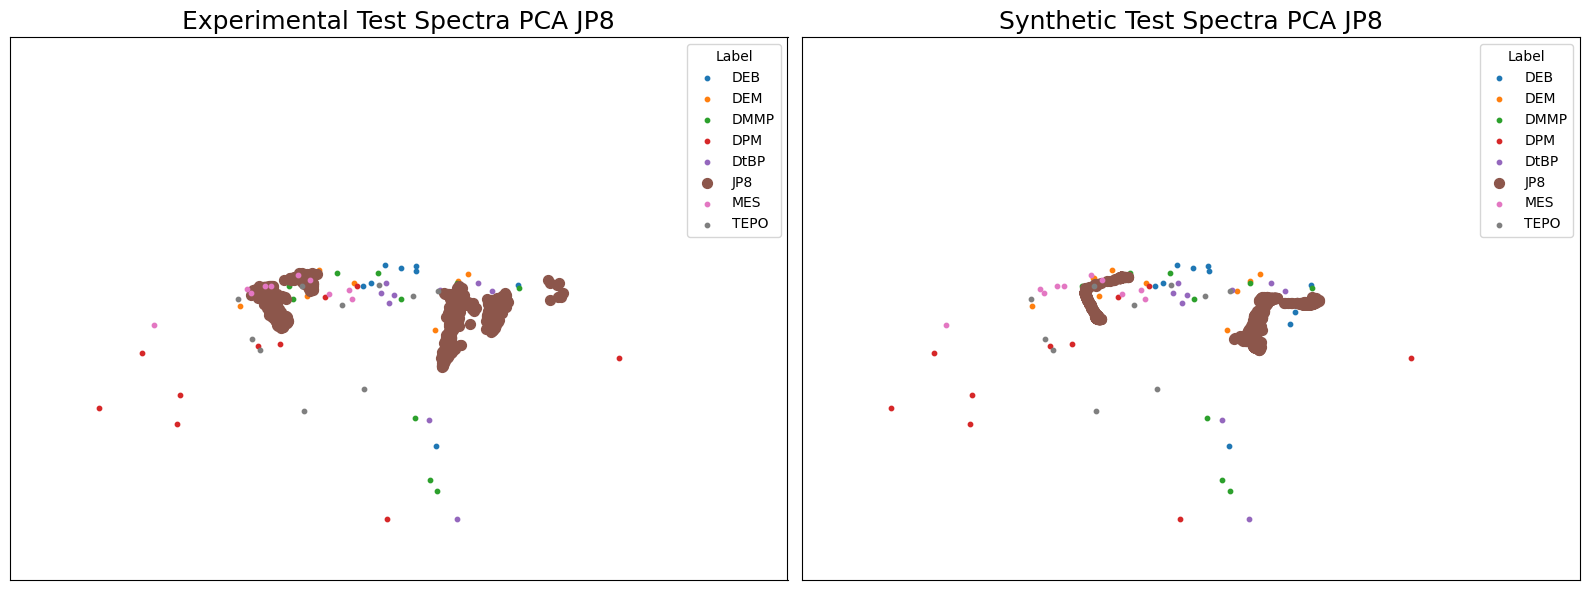

In [20]:
sorted_chem_names = list(test_spectra.columns[-8:])
f.plot_generation_results_pca_single_chem_side_by_side(
    test_spectra.iloc[:,2:-8], synthetic_spectra_df.iloc[:,2:], sorted_chem_names, 
    results_type='Test', chem_of_interest='JP8'
    )

In [65]:
importlib.reload(f)

<module 'functions' from '/home/cmdunham/ChemicalDataGeneration/models/functions.py'>

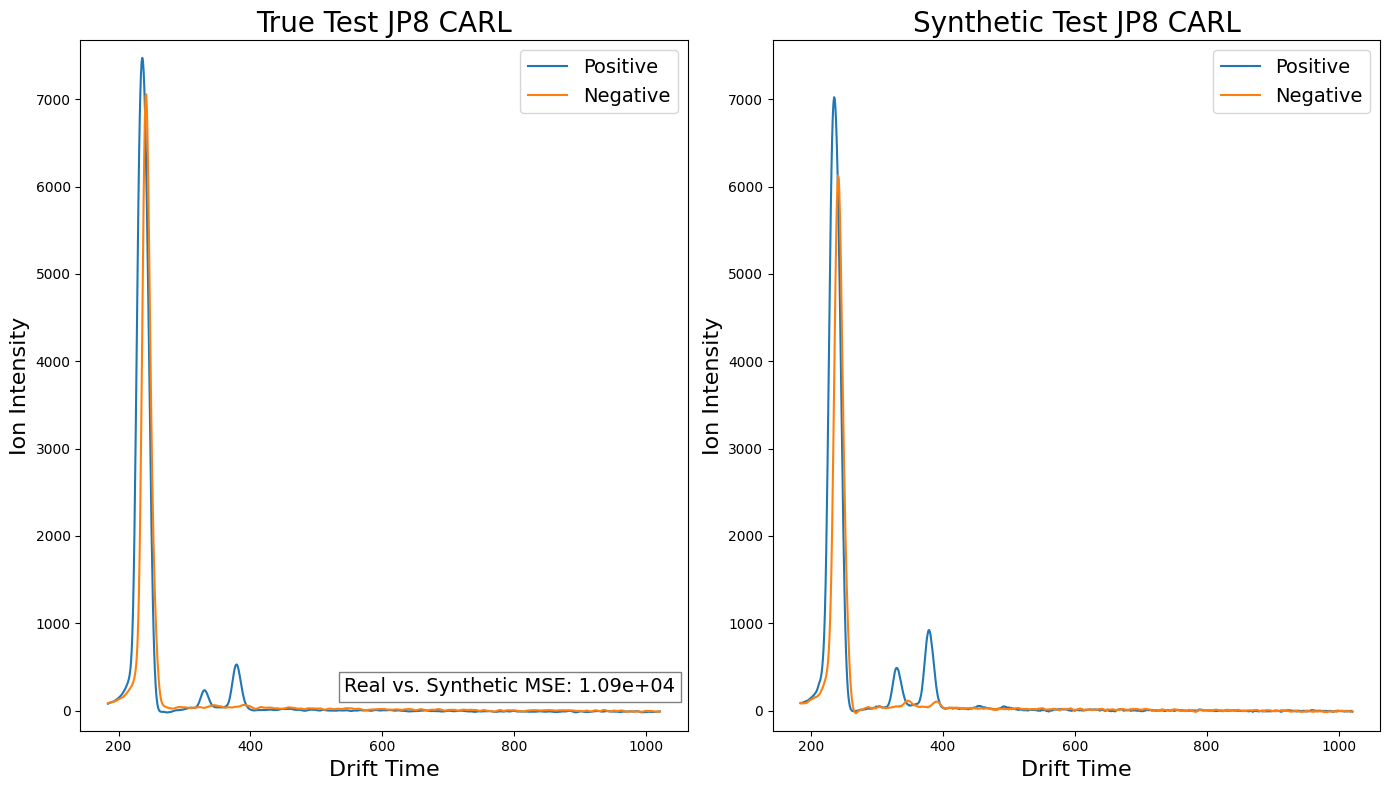

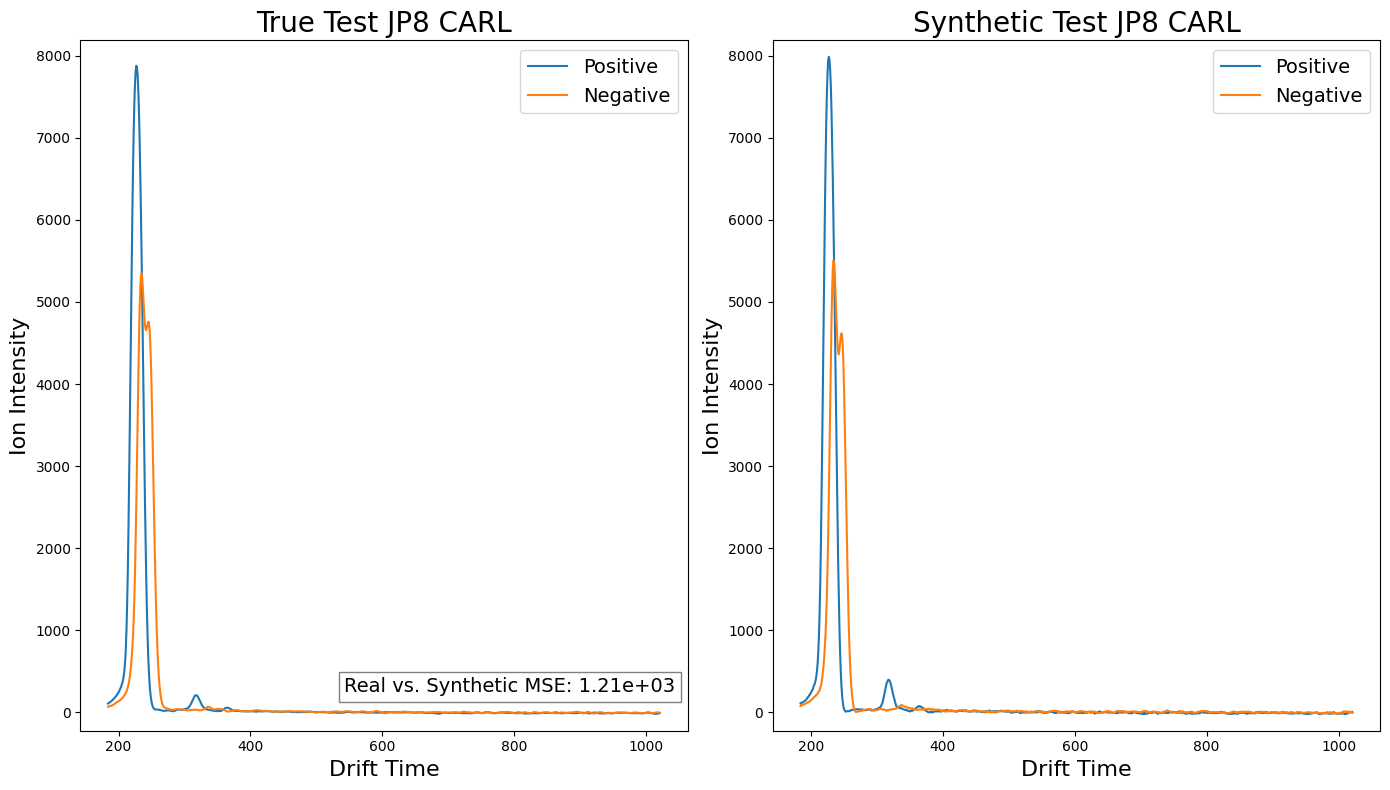

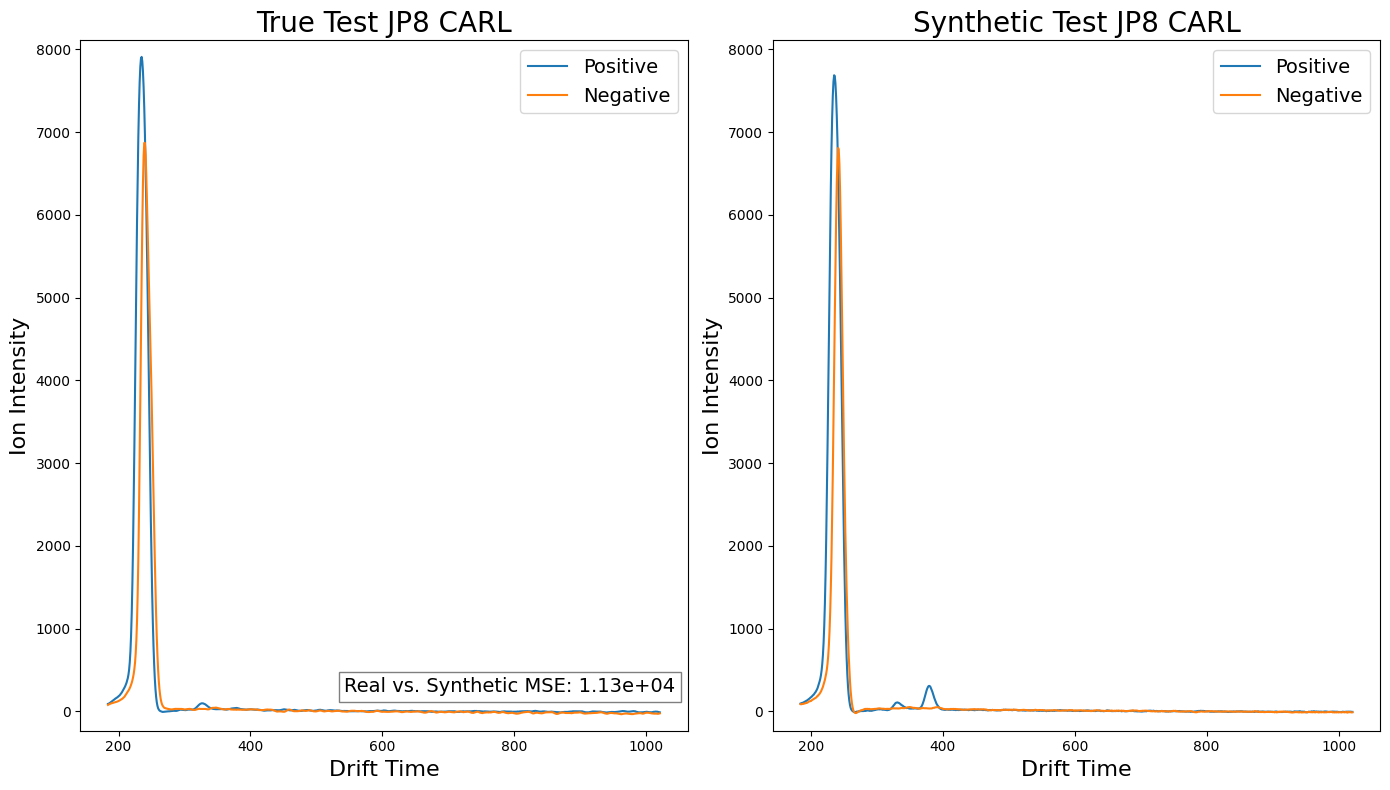

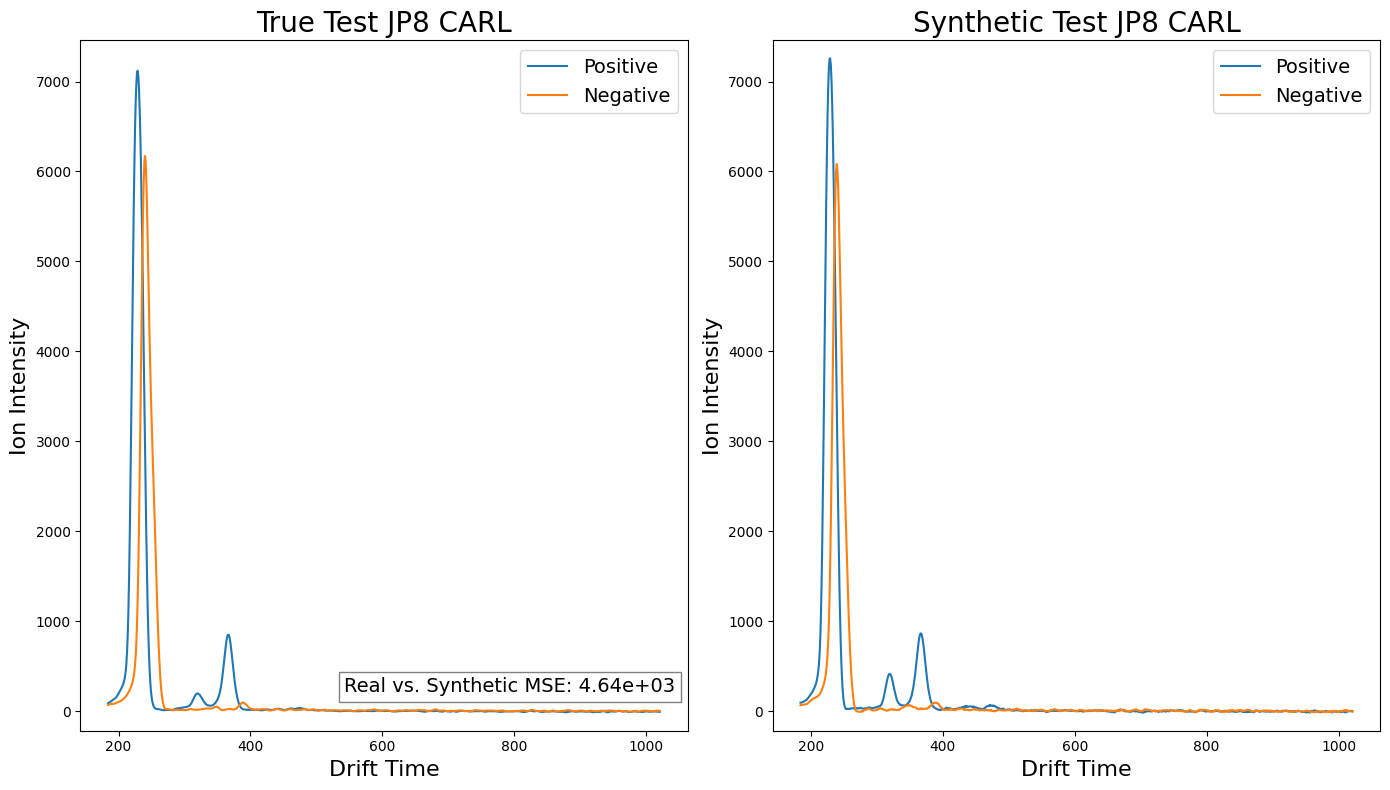

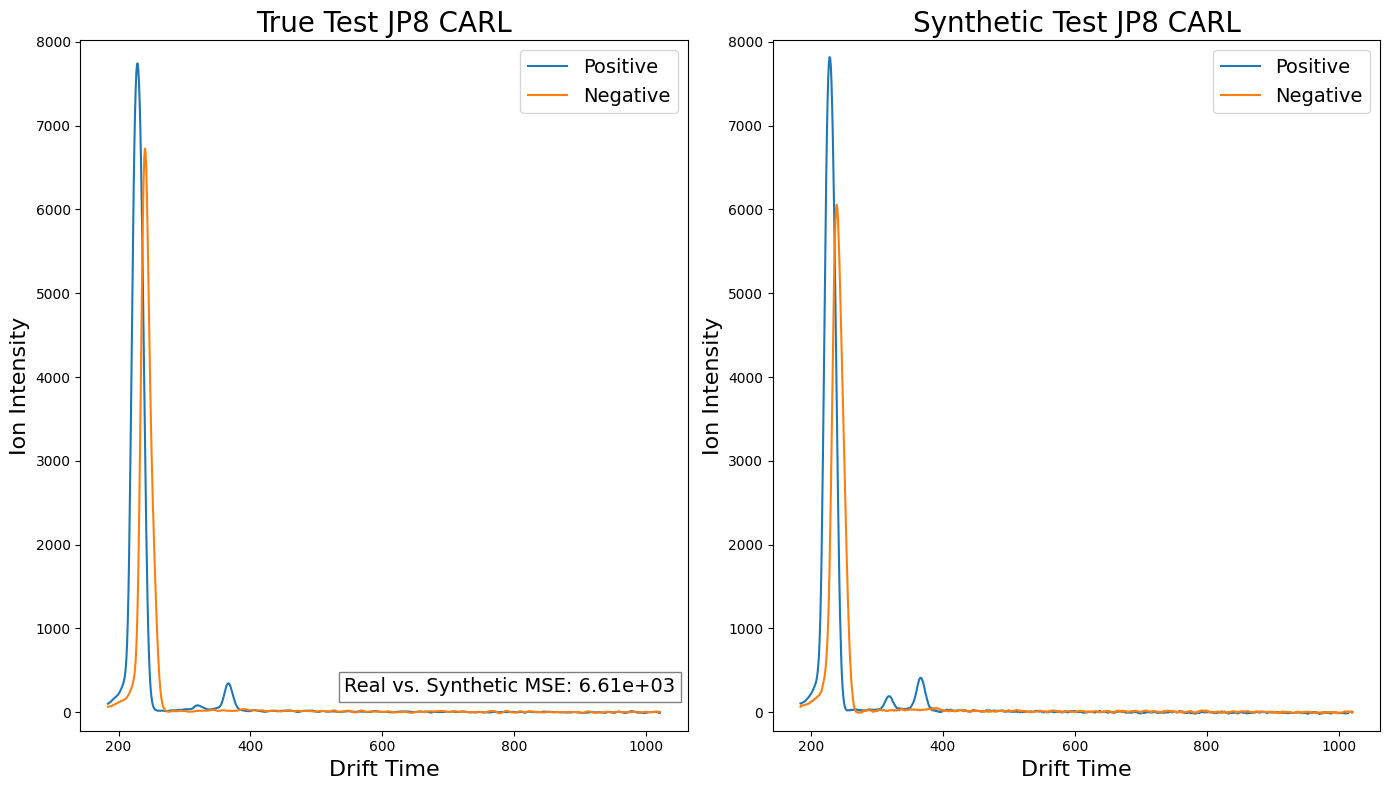

In [66]:
num_plots = 5
chem = 'JP8'
criterion = nn.MSELoss()
results_type ='Test'
test_spectra_single_chem = test_spectra[test_spectra['Label'] == chem]
indices = list(test_spectra_single_chem['index'])

for _ in range(num_plots):
    random_spec_idx = random.choice(indices)
    true_spec = test_spectra_single_chem[test_spectra_single_chem['index']==random_spec_idx]
    synthetic_spec = synthetic_spectra_df[synthetic_spectra_df['index']==random_spec_idx]
    true_spec_values = true_spec.iloc[:, 2:-9].values.flatten()
    synthetic_spec_values = synthetic_spec.iloc[:, 2:-1].values.flatten()
    f.plot_carl_real_synthetic_comparison(
        true_spec_values, synthetic_spec_values, results_type, chem, log_wandb=False, 
        show_wandb_run_name=False, criterion=criterion)

# Plotting General Decoder Results:
---

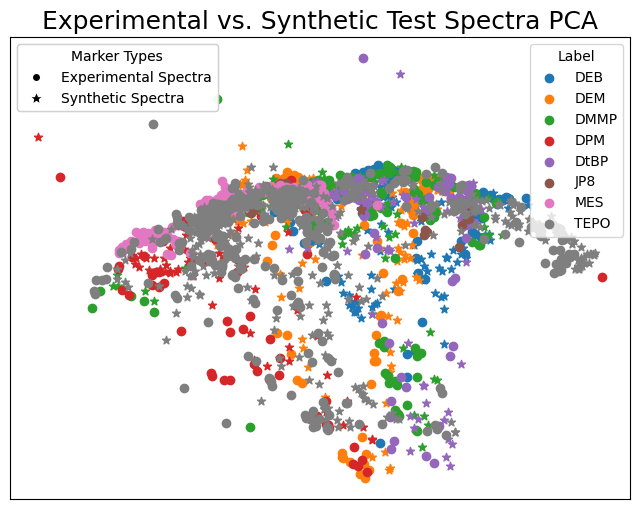

In [ ]:
# # Reload the functions module after updates
# importlib.reload(f)
# sorted_chem_names = list(test_spectra.columns[-8:])

# f.plot_generation_results_pca(
#         test_spectra.iloc[:,2:-8], synthetic_spectra_df.sample(n=1000, random_state=42), sorted_chem_names, 'Test', sample_size=1000, log_wandb=False,
#         mse_insert=None, insert_position=[0.05, 0.05], show_wandb_run_name=False)
# # f.plot_generation_results_pca(
# #         test_spectra.iloc[:,2:-8], synthetic_spectra_df, sorted_chem_names, 'Test', log_wandb=False,
# #         mse_insert=None, insert_position=[0.05, 0.05], show_wandb_run_name=False)

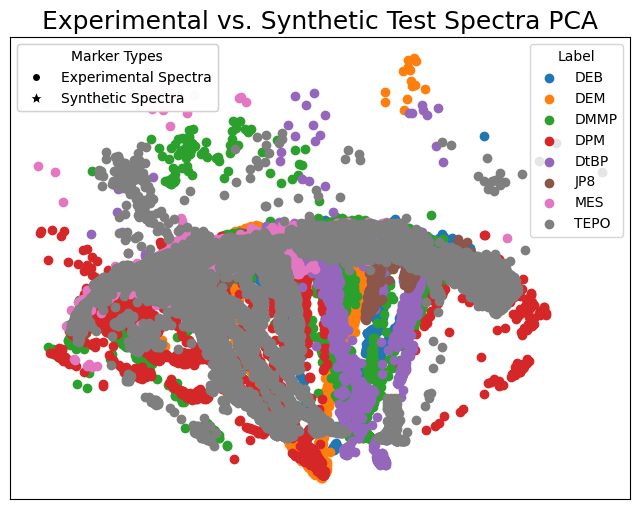

In [ ]:
# # Reload the functions module after updates
# importlib.reload(f)
# # Just looking at the PCA of the true spectra
# f.plot_generation_results_pca(
#         test_spectra.iloc[:,2:-8], synthetic_spectra_df, sorted_chem_names, 'Test', log_wandb=False,
#         mse_insert=None, insert_position=[0.05, 0.05], show_wandb_run_name=False)

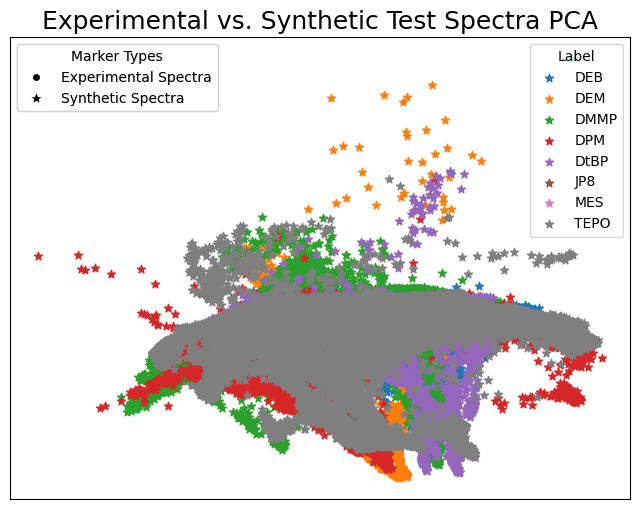

In [ ]:
# # Reload the functions module after updates
# importlib.reload(f)
# # Just looking at the PCA of the synthetic spectra
# f.plot_generation_results_pca(
#         test_spectra.iloc[:,2:-8], synthetic_spectra_df, sorted_chem_names, 'Test', log_wandb=False,
#         mse_insert=None, insert_position=[0.05, 0.05], show_wandb_run_name=False)

In [ ]:
# file_path = '/mnt/usb/cmdunham/synthetic_data/synthetic_test_spectra.csv'
# synthetic_spectra_df = pd.read_csv(file_path)

In [ ]:
# sorted_chem_names = list(test_spectra.columns[-8:])

# # set plot limits based on entire dataset so that plots scales are the same between chemicals
# pca = PCA(n_components=2)
# pca.fit(test_spectra.iloc[:,2:-9])
# true_transformed = pca.transform(test_spectra.iloc[:, 2:-9])
# synthetic_transformed = pca.transform(synthetic_spectra_df.iloc[:, :-1])
# min_x = min(true_transformed[:, 0].min(), synthetic_transformed[:, 0].min()) * 1.2
# max_x = min(true_transformed[:, 0].max(), synthetic_transformed[:, 0].max()) * 1.2
# min_y = min(true_transformed[:, 1].min(), synthetic_transformed[:, 1].min()) * 1.2
# max_y = min(true_transformed[:, 1].max(), synthetic_transformed[:, 1].max()) * 1.2

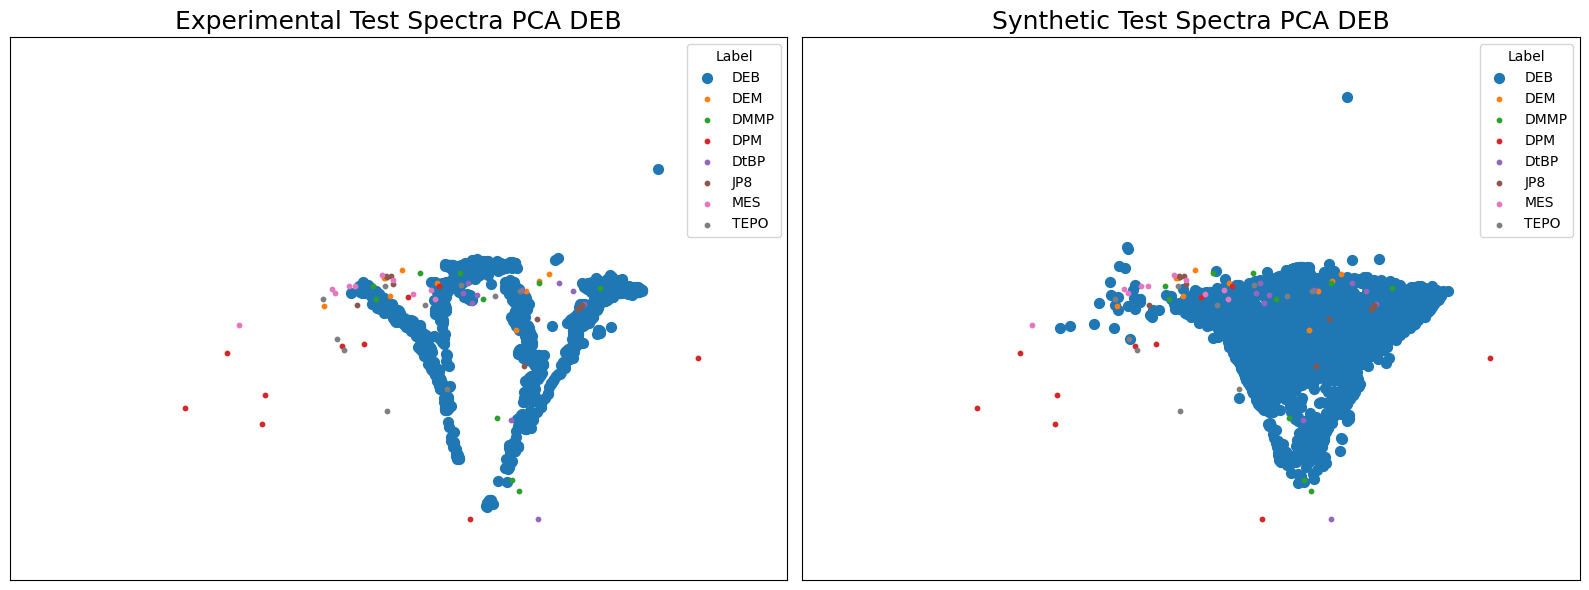

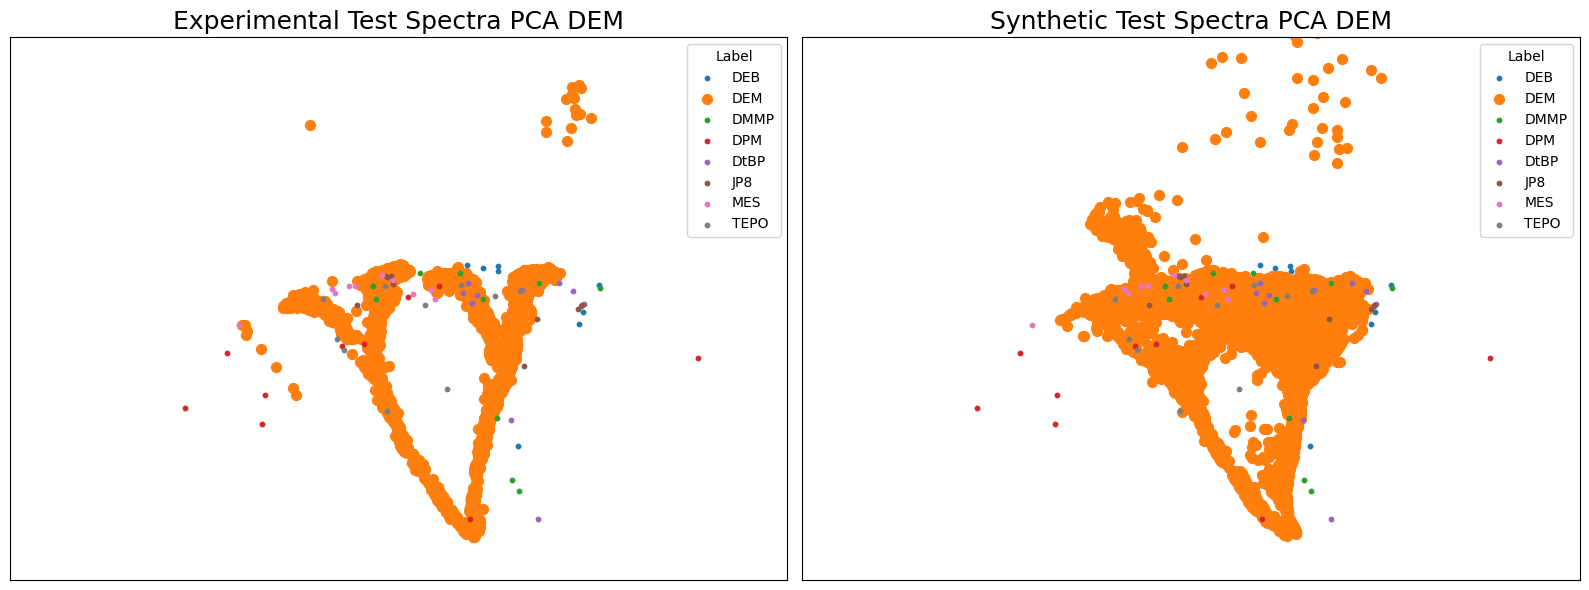

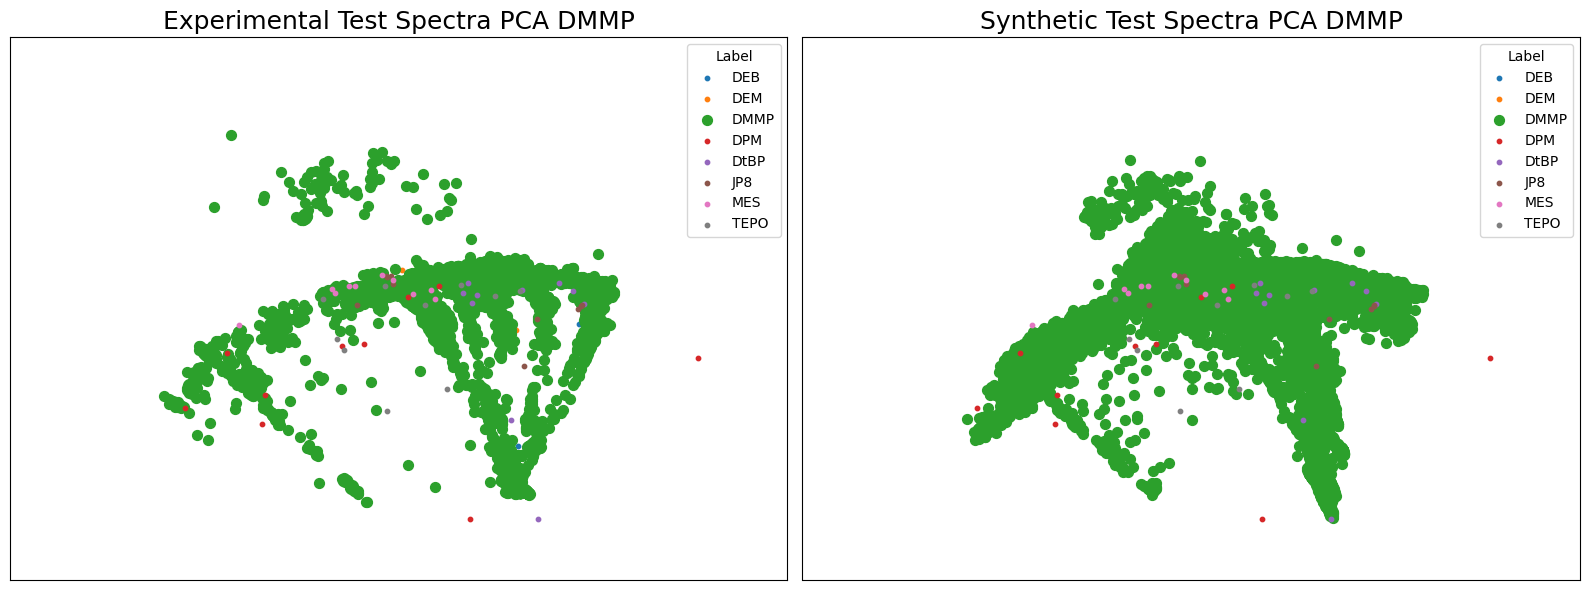

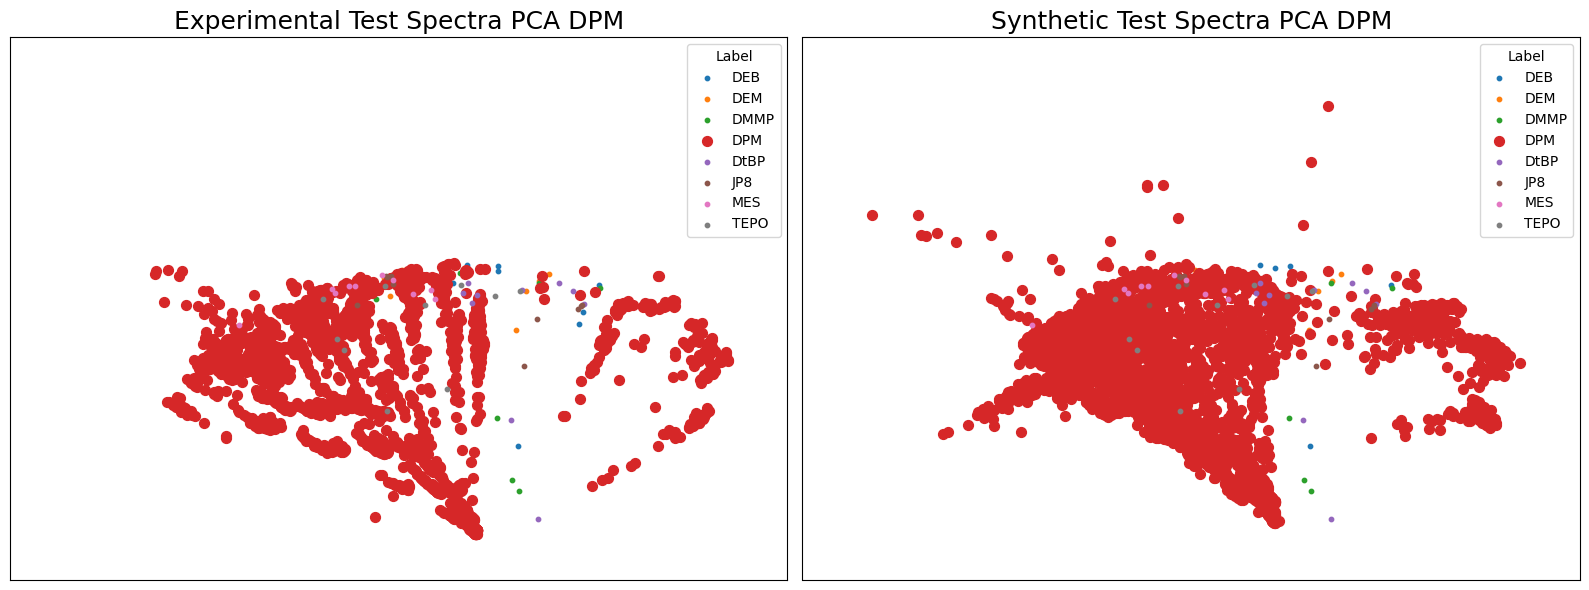

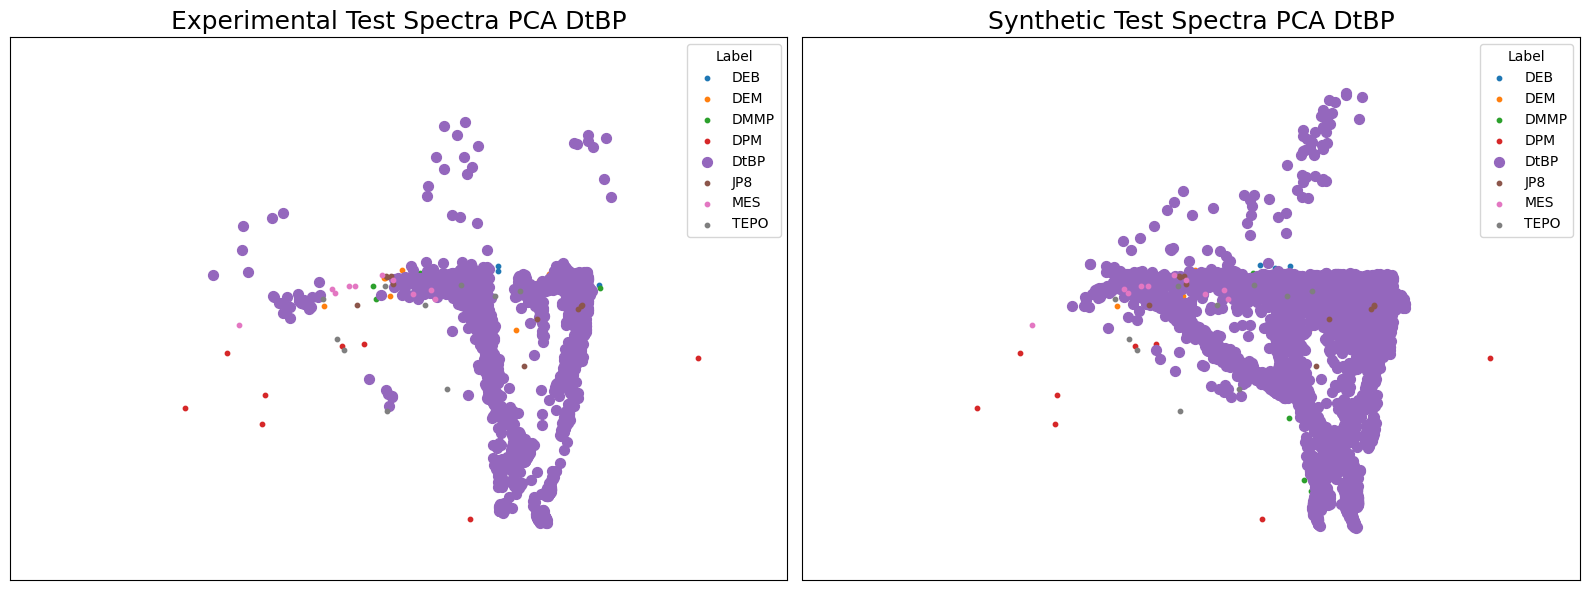

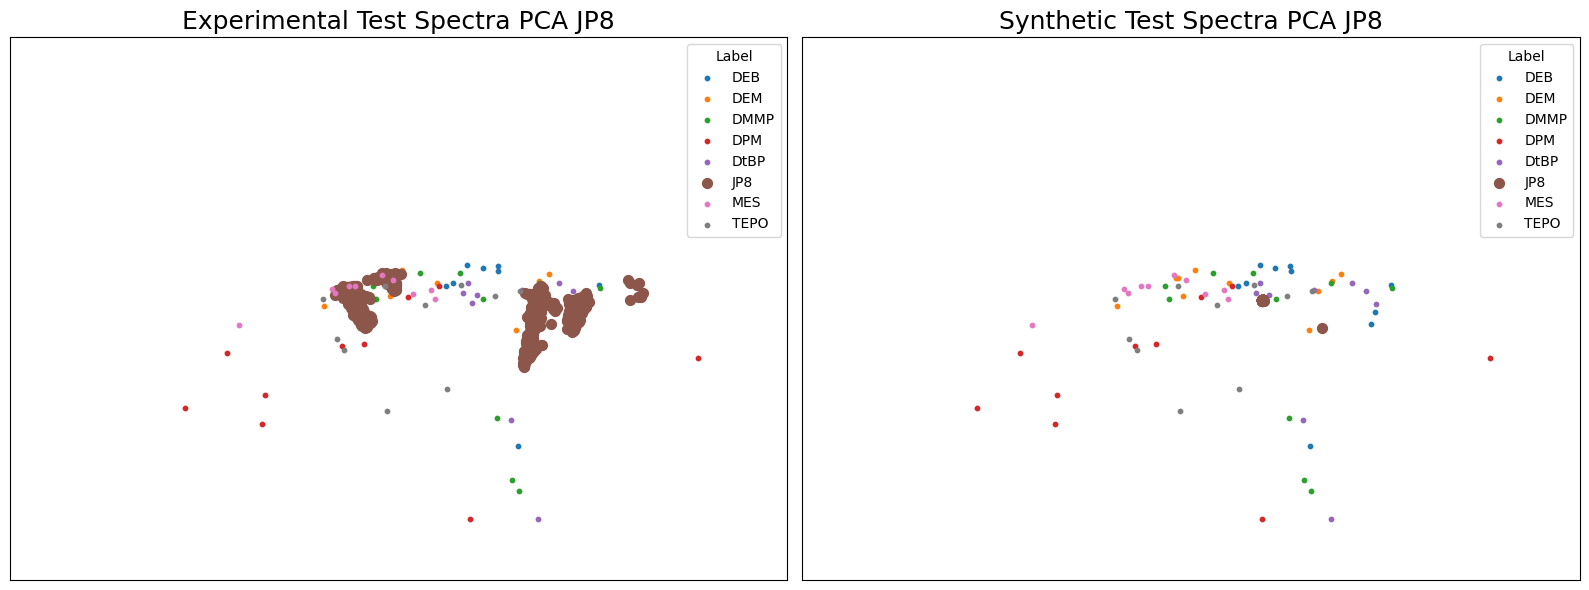

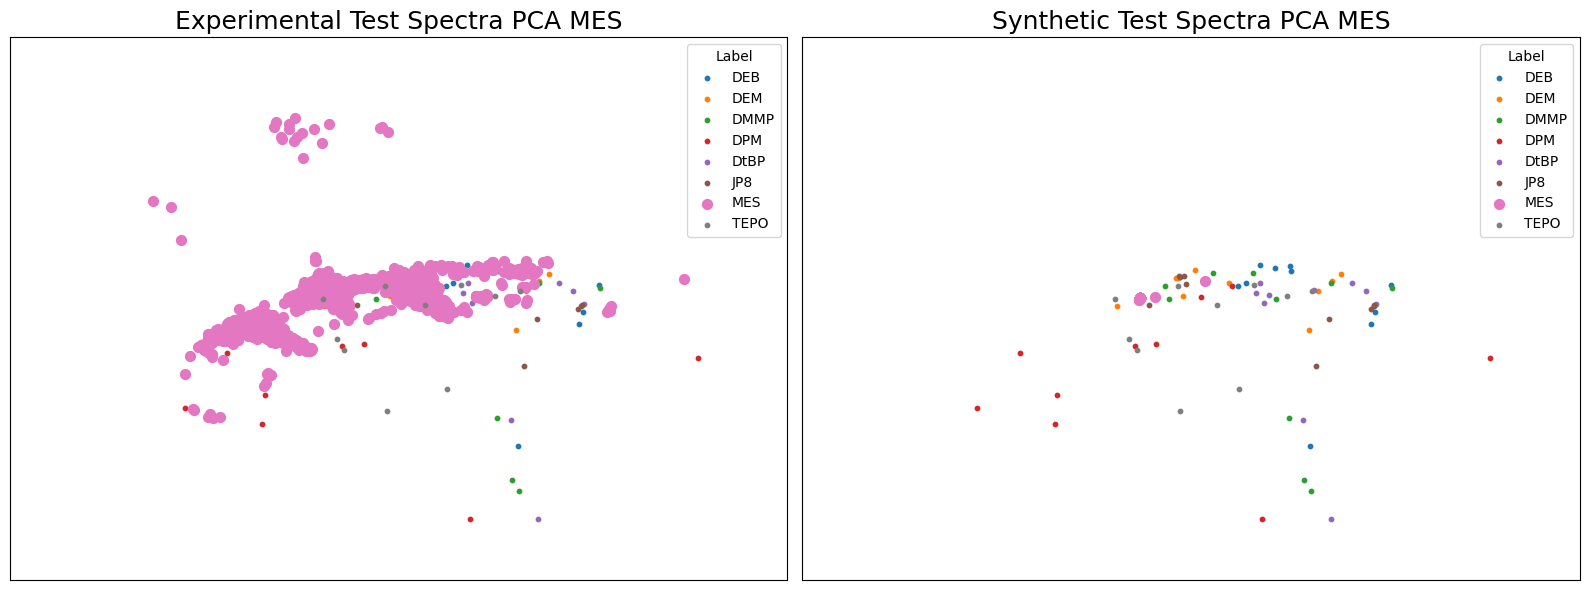

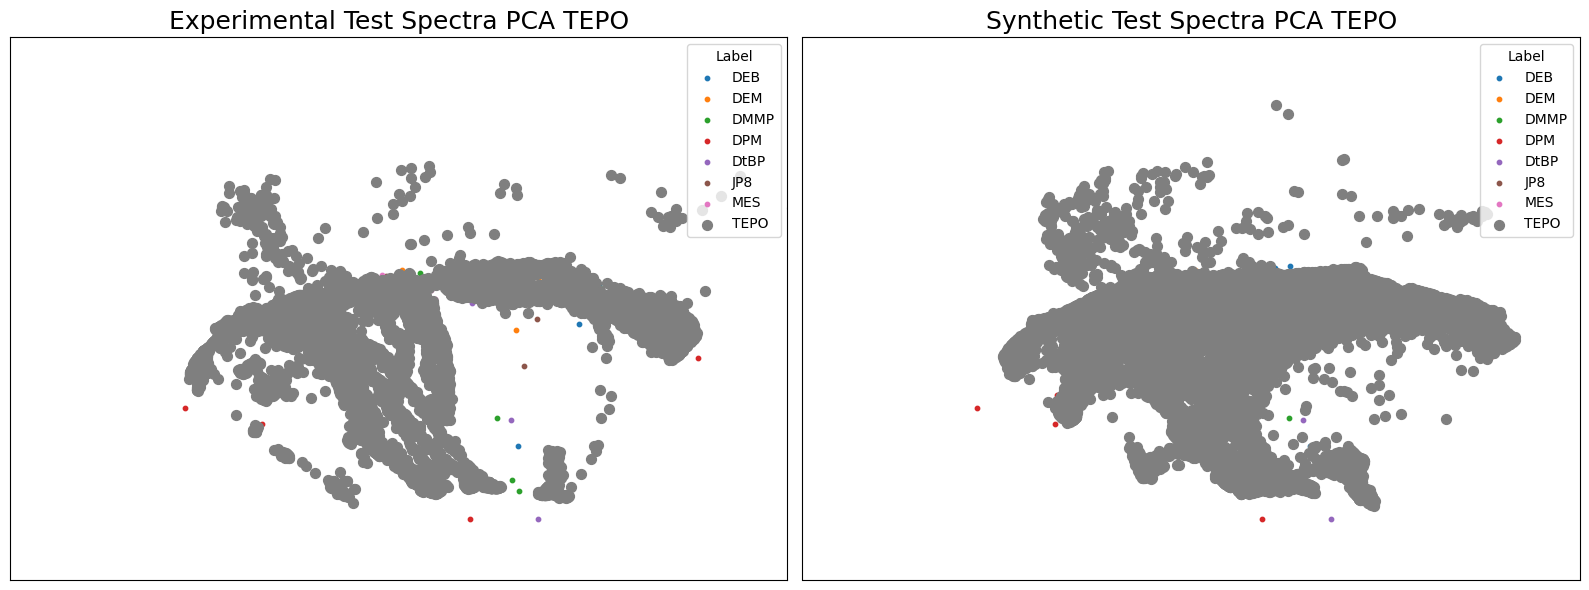

In [ ]:
# importlib.reload(f) #PLOTTING FUNCTION BROKEN, need to fix so that it only plots a sample of all data except the chem of interest
# # Looking at results one chemical at a time

# for chem in sorted_chem_names:
#     synthetic_chem_df_sample = pd.DataFrame(synthetic_spectra_df[synthetic_spectra_df['Label'] == chem])#.sample(n=1000, random_state=42)
#     f.plot_generation_results_pca_single_chem_side_by_side(
#         test_spectra.iloc[:,2:-8], synthetic_chem_df_sample, sorted_chem_names, 
#         results_type='Test', chem_of_interest=chem, 
#         x_lims=[min_x,max_x], y_lims=[min_y,max_y]
#         )

In [ ]:
# # Reload the functions module after updates
# importlib.reload(f)

# preds_list = [pred for pred_list in test_predicted_carls for pred in pred_list]
# indices_list = [ind for ind_list in corresponding_spectra_indices for ind in ind_list]
# test_encodings_list = [enc for enc_list in test_output_name_encodings for enc in enc_list]
# test_predicted_carls_list = [pred for pred_list in test_predicted_carls for pred in pred_list]

# run_name = 'celestial-field-553'
# num_plots = 5

# for _ in range(num_plots):
#     random_num = random.randint(0, len(test_spectra))
#     random_spec_idx = indices_list[random_num]
#     test_chem = sorted_chem_names[list(test_encodings_list[random_num]).index(1)]
#     test_spec = test_spectra[test_spectra['index'] == int(random_spec_idx)].iloc[:, 2:-9].values

#     synthetic_carl = test_predicted_carls_list[random_num]
#     synthetic_spec = convert_carl_to_spectrum(synthetic_carl, random_spec_idx, test_background_list)
    
#     f.plot_spectra_real_synthetic_comparison(
#         test_spec[0], synthetic_spec, 'Test', 
#         test_chem, log_wandb=False, show_wandb_run_name=True, criterion=criterion, run_name=run_name)

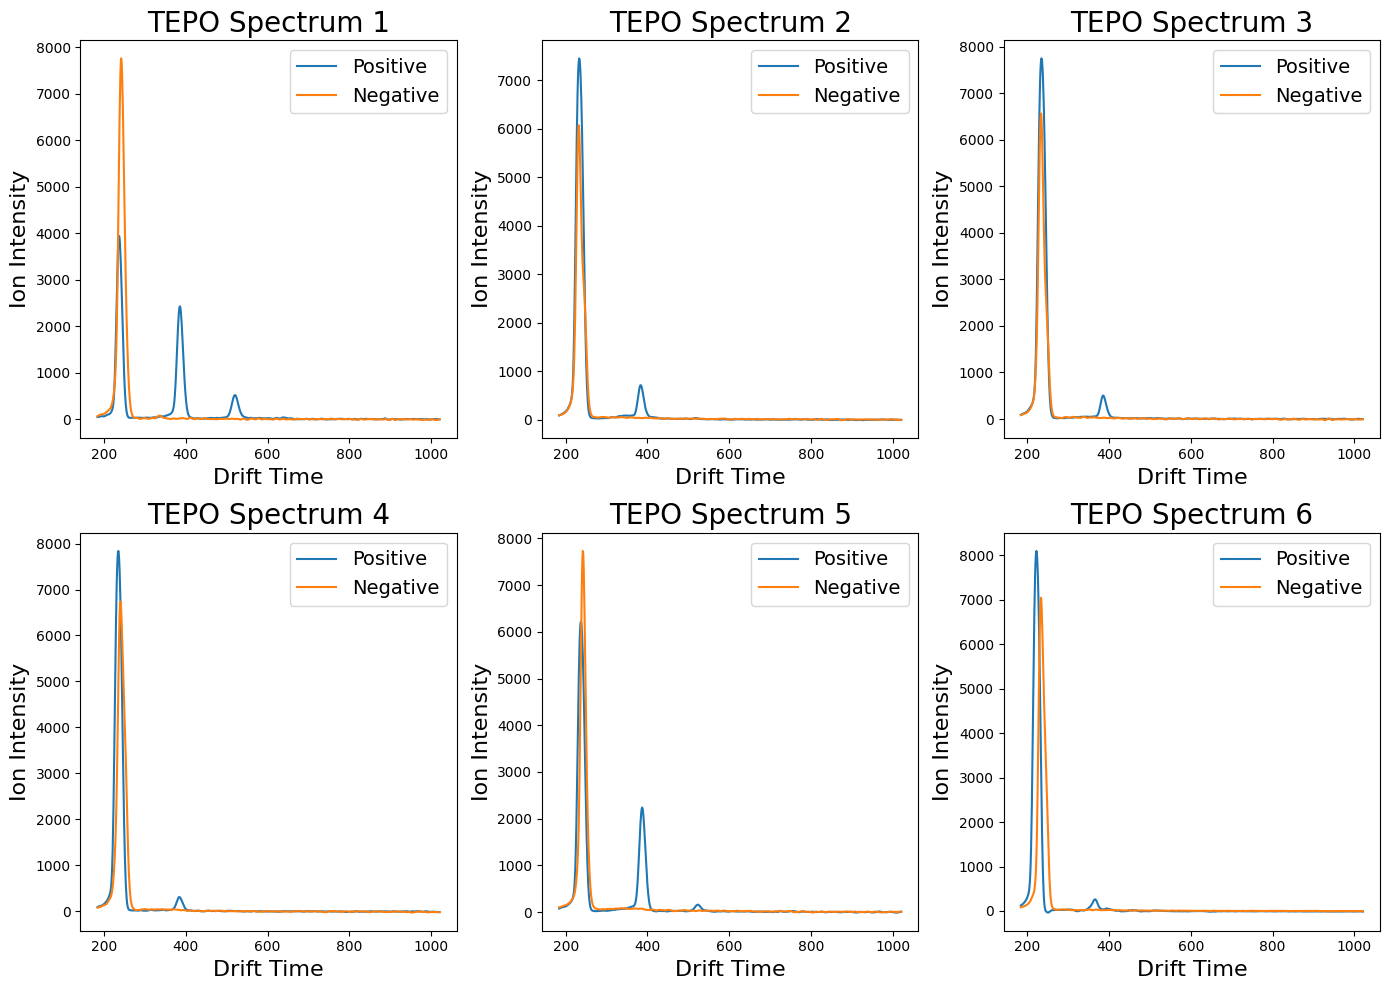

In [ ]:
# chem = 'TEPO'

# chem_true_spectra = test_spectra[test_spectra['Label'] == chem].reset_index(drop=True)
# chem_synthetic_spectra = synthetic_spectra_df[synthetic_spectra_df['Label'] == chem].reset_index(drop=True)
# test_sample = chem_true_spectra.sample(n=5).iloc[:,2:-9].reset_index(drop=True)
# synthetic_sample = chem_synthetic_spectra.sample(n=1).iloc[:,:-1].reset_index(drop=True)

# num_plots = 6
# cols = 3  # Number of columns for the subplots
# rows = (num_plots + cols - 1) // cols  # Calculate number of rows needed
# fig, axes = plt.subplots(rows, cols, figsize=(14, 10))

# # Flatten the axes array for easy iteration
# axes = axes.flatten()

# for idx, row in test_sample.iterrows():
#     numbers = range(184, (len(row)//2)+184)

#     axes[idx].plot(numbers, row[:len(numbers)], label='Positive')
#     axes[idx].plot(numbers, row[len(numbers):], label='Negative')
#     axes[idx].set_title(f'{chem} Spectrum {idx+1}', fontsize=20)
#     axes[idx].set_xlabel('Drift Time', fontsize=16)
#     axes[idx].set_ylabel('Ion Intensity', fontsize=16)
#     axes[idx].legend(fontsize=14)

# for idx, row in synthetic_sample.iterrows():
#     numbers = range(184, (len(row)//2)+184)

#     axes[5].plot(numbers, row[:len(numbers)], label='Positive')
#     axes[5].plot(numbers, row[len(numbers):], label='Negative')
#     axes[5].set_title(f'{chem} Spectrum 6', fontsize=20)
#     axes[5].set_xlabel('Drift Time', fontsize=16)
#     axes[5].set_ylabel('Ion Intensity', fontsize=16)
#     axes[5].legend(fontsize=14)

# plt.tight_layout()
# plt.show()